## Contributor

Isaac Muturi

Follow me on Twitter 🐦, connect with me on LinkedIn 🔗, and check out my GitHub 🐙. You won't be disappointed!

👉 Twitter: https://twitter.com/NdiranguMuturi1?t=xXF2OKsqOUeb5J_4yysFKg&s=09

👉 LinkedIn: https://www.linkedin.com/in/isaac-muturi-3b6b2b237

👉 GitHub: https://github.com/Isaac-Ndirangu-Muturi-749


# Predictive Modeling for Car Purchase Amount: Customer Behavior Modeling for Enhanced Car Sales Strategy

![carpurchase](car_purchase.png)

# Business Understanding

## Project Overview

The objective of this project is to develop a predictive model that can accurately estimate the car purchase amount a customer is likely to spend based on various customer attributes. Understanding and predicting customer behavior in terms of car purchases is crucial for automotive companies to tailor their marketing strategies, optimize sales efforts, and enhance customer satisfaction.

## Business Goals

The primary business goals of this project are as follows:

1. **Accurate Predictions:** Develop a predictive model with high accuracy to estimate car purchase amounts. Accurate predictions will enable the company to better allocate resources and optimize inventory management.

2. **Customer Segmentation:** Identify and understand customer segments based on their demographics, income levels, and other attributes. This will help in creating targeted marketing campaigns and product offerings.

3. **Marketing Strategy:** Use insights from the model to develop and refine marketing strategies. Understand which customer groups are more likely to make high-value car purchases and tailor advertising accordingly.

4. **Sales Optimization:** Optimize sales efforts by focusing on potential high-value customers. Provide sales teams with valuable insights to enhance their interactions with customers.

5. **Customer Satisfaction:** Enhance the overall customer experience by offering personalized services and recommendations based on predicted car purchase amounts.

## Data Sources

The project will rely on a dataset containing historical customer data. This dataset includes information such as customer demographics, annual income, credit card debt, net worth, and email domains. The dataset will be used to train and test the predictive model.

## Methodology

The project will follow these key steps:

1. **Data Preprocessing:** The dataset will be cleaned and prepared for analysis. This includes handling missing data, encoding categorical variables, and scaling numerical features.

2. **Exploratory Data Analysis (EDA):** Explore the dataset to gain insights into customer behavior and relationships between variables. EDA will inform feature selection and model development.

3. **Feature Engineering:** Create new features or transform existing ones to improve model performance.

4. **Model Development:** Build predictive models using regression techniques. Evaluate the models for accuracy and choose the most suitable one for car purchase predictions.

5. **Regularization:** Apply regularization techniques like Lasso or Ridge regression to prevent overfitting and enhance model interpretability.

6. **Model Evaluation:** Evaluate the chosen model using appropriate metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared.

7. **Feature Importance:** Identify the most important features contributing to car purchase predictions.

8. **Business Insights:** Translate model results into actionable business insights and recommendations.

## Expected Outcomes

The expected outcomes of this project include:

- A predictive model capable of estimating car purchase amounts accurately.
- Insights into customer segments and their preferences.
- Enhanced marketing and sales strategies.
- Improved customer satisfaction and personalized services.

By achieving these outcomes, the company can make data-driven decisions to boost sales and customer engagement while optimizing resources effectively.

# DATA UNDERSTANDING

# Dataset Analyzer

This class, `DatasetAnalyzer`, is designed to analyze a dataset related to banking. It provides various methods to gather insights about the dataset, identify patterns, and address data quality issues. This class is part of a broader data analysis and preprocessing process.

## How It Works

### Initialization

1. Import the necessary libraries: `pandas`, `matplotlib.pyplot`, `seaborn`, and `numpy`.

2. Define a class named `DatasetAnalyzer` that takes the path to the dataset as a parameter during initialization (`dataset_path`).

3. Inside the `__init__` method, the dataset is loaded using `pd.read_csv()` and stored as an attribute (`self.dataset`).

### Data Exploration and Analysis Methods

The class provides several methods to explore and analyze the dataset:

- `preview_dataset(num_rows)`: Displays the first and last few rows of the dataset.

- `check_columns_list()`: Returns a list of columns in the dataset.

- `explore_column_value_counts()`: Prints the value counts for each column in the dataset.

- `get_dataset_shape()`: Returns the number of rows and columns in the dataset.

- `get_dataset_info()`: Displays information about the dataset, including data types and memory usage.

- `get_dataset_description()`: Provides a statistical description of the dataset, including measures like mean, min, max, and quartiles.

- `analyze_duplicated_rows()`: Counts and visualizes the percentage of duplicated rows in the dataset.

- `analyze_missing_values()`: Counts and visualizes the percentage of missing values for each column in the dataset.

- `count_data_types()`: Returns the count of data types present in the dataset.

- `count_unique_values_by_dtype()`: Counts and prints the number of unique values for integer, float, and object columns.

Each method is designed to provide insights into different aspects of the dataset, helping to identify data quality issues, patterns, and trends.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class DatasetAnalyzer:
    def __init__(self, dataset_path, delimiter=',', encoding='utf-8'):
        # Initialize the DatasetAnalyzer with the dataset path, delimiter, and encoding
        self.dataset_path = dataset_path
        self.delimiter = delimiter
        self.encoding = encoding
        self.dataset = pd.read_csv(dataset_path, delimiter=self.delimiter, encoding=self.encoding)

    def preview_dataset(self, num_rows=5):
        # Display the first few and last few rows of the dataset
        print(f"Preview of the dataset (first {num_rows} rows):")
        print(self.dataset.head(num_rows))
        print(f"Preview of the dataset (last {num_rows} rows):")
        print(self.dataset.tail(num_rows))

    def check_columns_list(self):
        # Get the list of columns in the dataset
        return self.dataset.columns.tolist()

    def explore_column_value_counts(self):
        # Explore the value counts for each column
        column_value_counts = {}

        for column in self.dataset.columns:
            column_value_counts[column] = self.dataset[column].value_counts()

        for column, values in column_value_counts.items():
            print(f"Value Counts for Column '{column}':\n{values}\n")

    def get_dataset_shape(self):
        # Get the shape of the dataset
        return self.dataset.shape

    def get_dataset_info(self):
        # Get information about the dataset
        return self.dataset.info()

    def get_dataset_description(self):
        # Get a statistical description of the dataset
        return self.dataset.describe()

    def analyze_duplicated_rows(self):
        # Analyze duplicate rows
        duplicate_count = self.dataset.duplicated().sum()

        # Print duplicate rows count
        print("Duplicate Rows Count:", duplicate_count)

        # Calculate the percentage of duplicate rows
        duplicate_percentage = (duplicate_count / len(self.dataset)) * 100

        # Create a bar chart to visualize the percentage of duplicate rows
        plt.figure(figsize=(6, 4))
        sns.barplot(x=["Duplicate Rows", "Non-Duplicate Rows"],
                    y=[duplicate_percentage, 100 - duplicate_percentage], color='skyblue', edgecolor='black')
        plt.ylabel("Percentage (%)")
        plt.title("Percentage of Duplicated Rows")
        plt.tight_layout()
        plt.show()

    def analyze_missing_values(self):
        # Analyze missing values
        missing_values_count = self.dataset.isnull().sum()

        # Print missing values counts
        print("Missing Values Counts:")
        print(missing_values_count)

         # Calculate the percentage of missing values for each column
        missing_percentage = (self.dataset.isnull().sum() / len(self.dataset)) * 100

        # Create a bar chart to visualize the percentage of missing values
        plt.figure(figsize=(10, 6))
        sns.barplot(x=missing_percentage.index, y=missing_percentage.values, color='skyblue', edgecolor='black')
        plt.xlabel('Columns')
        plt.ylabel('Percentage of Missing Values')
        plt.title('Percentage of Missing Values in Each Column')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def count_data_types(self):
        # Count the data types in the dataset
        return self.dataset.dtypes.value_counts()

    def count_unique_values_by_dtype(self):
         # Group columns by data type
        data_types = self.dataset.dtypes

        # Separate columns by data type
        int_columns = data_types[data_types == 'int64'].index
        float_columns = data_types[data_types == 'float64'].index
        object_columns = data_types[data_types == 'object'].index

        print("Unique Values Counts by Data Type:")

        # Print columns and their counts for each data type
        print("Integer Columns:")
        print(self.dataset[int_columns].nunique())

        print("\nFloat Columns:")
        print(self.dataset[float_columns].nunique())

        print("\nObject Columns:")
        print(self.dataset[object_columns].nunique())

In [2]:
# Create an instance of DatasetAnalyzer
analyzer = DatasetAnalyzer("data/car_purchasing.csv", encoding='latin1')




In [3]:
# Preview the dataset
analyzer.preview_dataset()

Preview of the dataset (first 5 rows):
     customer name                                    customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        country  gender        age  annual Salary  credit card debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     net worth  car purchase amount  
0  238961.2505          35321.45877  
1  530973.9078     

In [4]:
# Get the list of columns in the dataset
columns_list = analyzer.check_columns_list()
print("Columns in the dataset:", columns_list)

Columns in the dataset: ['customer name', 'customer e-mail', 'country', 'gender', 'age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']


In [5]:
# Explore value counts for each column
analyzer.explore_column_value_counts()

Value Counts for Column 'customer name':
Seth                   2
Walter                 2
Jimenez, Joel G.       1
Benjamin               1
Macdonald, Rahim B.    1
                      ..
Graiden Powell         1
Mcclure, Avye L.       1
Alexander York         1
Lucian Medina          1
Solomon Atkinson       1
Name: customer name, Length: 498, dtype: int64

Value Counts for Column 'customer e-mail':
sociis.natoque.penatibus@uterat.ca          1
cursus.vestibulum.Mauris@pedenonummy.com    1
nec.eleifend@orci.org                       1
vitae.sodales.at@molestiearcuSed.org        1
Vivamus.nisi@elitpharetraut.ca              1
                                           ..
adipiscing.elit@Nunc.com                    1
sed.est@afelisullamcorper.edu               1
egestas@malesuadavelvenenatis.com           1
magna@sagittisaugueeu.org                   1
nunc.nulla.vulputate@dignissimmagnaa.edu    1
Name: customer e-mail, Length: 500, dtype: int64

Value Counts for Column 'country':
Ma

In [6]:
# Get the shape of the dataset
dataset_shape = analyzer.get_dataset_shape()
print("Shape of the dataset:", dataset_shape)

Shape of the dataset: (500, 9)


In [7]:
# Get information about the dataset
dataset_info = analyzer.get_dataset_info()
print("Information about the dataset:")
print(dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB
Information about the dataset:
None


In [8]:
# Get a statistical description of the dataset
dataset_description = analyzer.get_dataset_description()
print("Statistical description of the dataset:")
print(dataset_description)

Statistical description of the dataset:
           gender         age  annual Salary  credit card debt  \
count  500.000000  500.000000     500.000000        500.000000   
mean     0.506000   46.241674   62127.239608       9607.645049   
std      0.500465    7.978862   11703.378228       3489.187973   
min      0.000000   20.000000   20000.000000        100.000000   
25%      0.000000   40.949969   54391.977195       7397.515792   
50%      1.000000   46.049901   62915.497035       9655.035568   
75%      1.000000   51.612263   70117.862005      11798.867488   
max      1.000000   70.000000  100000.000000      20000.000000   

            net worth  car purchase amount  
count      500.000000           500.000000  
mean    431475.713625         44209.799218  
std     173536.756340         10773.178744  
min      20000.000000          9000.000000  
25%     299824.195900         37629.896040  
50%     426750.120650         43997.783390  
75%     557324.478725         51254.709517  
max  

Duplicate Rows Count: 0


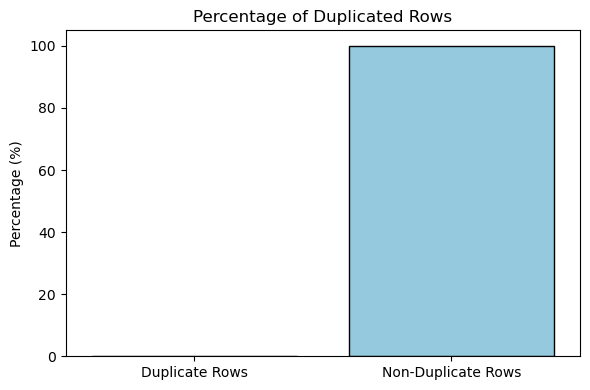

In [9]:
# Analyze duplicate rows and visualize the percentage
analyzer.analyze_duplicated_rows()

Missing Values Counts:
customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64


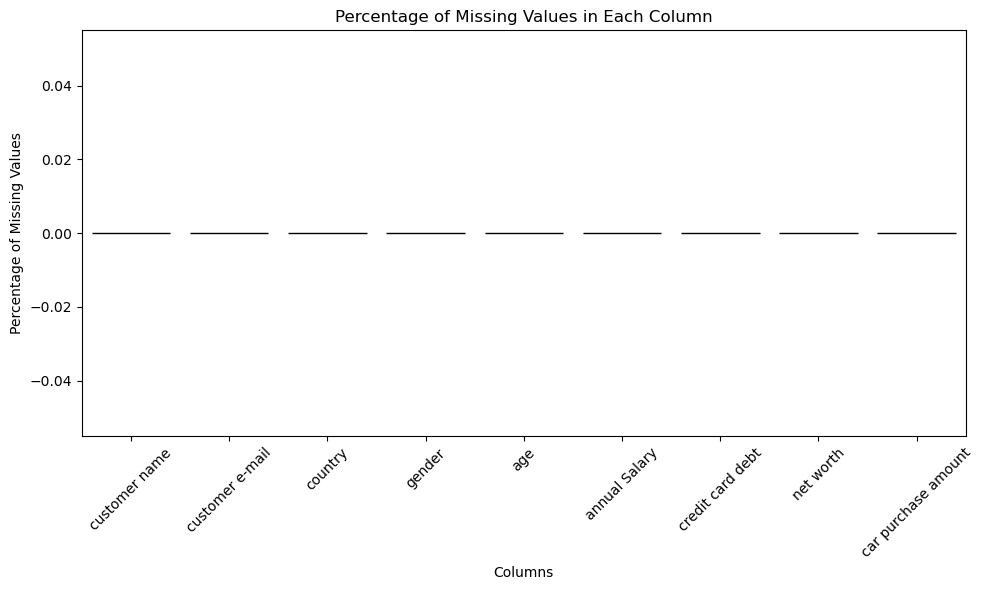

In [10]:
# Analyze missing values and visualize the percentage
analyzer.analyze_missing_values()

In [11]:
# Count data types in the dataset
data_type_counts = analyzer.count_data_types()
print("Data types counts:")
print(data_type_counts)

Data types counts:
float64    5
object     3
int64      1
dtype: int64


In [12]:
# Count unique values by data type
analyzer.count_unique_values_by_dtype()

Unique Values Counts by Data Type:
Integer Columns:
gender    2
dtype: int64

Float Columns:
age                    500
annual Salary          500
credit card debt       500
net worth              500
car purchase amount    500
dtype: int64

Object Columns:
customer name      498
customer e-mail    500
country            211
dtype: int64


## Dataset Understanding Summary

Here is a concise summary of the key information about the second dataset:

### General Information

- The dataset contains 500 rows and 9 columns.
- The columns represent various features, including both numerical and categorical features.

### Column Description

1. **customer name**: Name of the customer.
2. **customer e-mail**: Email address of the customer.
3. **country**: Country where the customer is located (categorical).
4. **gender**: Gender of the customer (binary: 0 for male, 1 for female).
5. **age**: Age of the customer (numerical).
6. **annual Salary**: Annual salary of the customer (numerical).
7. **credit card debt**: Amount of credit card debt (numerical).
8. **net worth**: Net worth of the customer (numerical).
9. **car purchase amount**: Amount spent on a car purchase (numerical).

### Data Statistics

- The dataset provides statistics for each numerical column, including mean, standard deviation, minimum, maximum, and quartile values.
- The 'gender' column is binary, with values 0 and 1 indicating male and female, respectively.

### Data Quality

- There are no missing values in any of the columns.
- No duplicate rows are present in the dataset.

### Data Types

- The dataset contains a mix of data types:
  - 5 columns are of the `float64` data type (numerical).
  - 1 column is of the `int64` data type (binary).
  - 3 columns are of the `object` data type (categorical).

### Value Counts

- The 'customer name' column contains several unique names.
- The 'customer e-mail' column contains unique email addresses.
- The 'country' column has 211 unique values, indicating multiple countries.
- The 'gender' column is binary, with 2 unique values (0 and 1).

This dataset appears to be related to customer information, including demographics and financial data. The goal could be to analyze customer behavior or predict car purchase amounts based on the available features.

If you have any specific analysis or tasks you'd like to perform on this dataset, please let me know, and I'll be happy to assist further.

## EXPLOTARY DATA ANALYSIS(EDA)

In [13]:
df = analyzer.dataset

# Univariate Data Visualization

The `UnivariateVisualizer` class is designed to help visually explore the distribution of categorical and continuous variables in your dataset. This can provide insights into the characteristics of individual variables, their frequency distribution, and help identify potential trends or patterns.

## Usage

To use the `UnivariateVisualizer`, follow these steps:

1. Instantiate the class with your dataset: `visualizer = UnivariateVisualizer(data)`.
2. Call the `plot_categorical_distribution()` method to visualize the distribution of categorical variables.
3. Call the `plot_continuous_distribution()` method to visualize the distribution of continuous variables.


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

class UnivariateVisualizer:
    def __init__(self, data):
        self.data = data
        self.categorical_vars = self.data.select_dtypes(include=['object']).columns.tolist()
        self.continuous_vars = self.data.select_dtypes(include=['int64', 'float64']).columns.tolist()
        sns.set_palette("pastel")

    def plot_categorical_distribution(self):
        num_cat_vars = len(self.categorical_vars)
        num_rows = (num_cat_vars + 1) // 2  # Adjust number of rows
        num_cols = 2  # Fixed number of columns

        fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 6 * num_rows))
        for ax, cat_var in zip(axes.flatten(), self.categorical_vars):
            sns.countplot(data=self.data, x=cat_var, ax=ax)
            ax.set_title(f'Distribution of {cat_var}\n')
            ax.set_ylabel('Count')
            ax.set_xlabel(cat_var)
            ax.tick_params(axis='x', rotation=45)
        plt.tight_layout()
        plt.show()

    def plot_continuous_distribution(self):
        num_cont_vars = len(self.continuous_vars)
        num_rows = (num_cont_vars + 2) // 3  # Adjust number of rows
        num_cols = 3  # Fixed number of columns

        fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 6 * num_rows))
        for ax, cont_var in zip(axes.flatten(), self.continuous_vars):
            sns.histplot(data=self.data, x=cont_var, bins=20, kde=True, ax=ax)
            ax.set_title(f'Distribution of {cont_var}\n')
            ax.set_ylabel('Count')
            ax.set_xlabel(cont_var)
            ax.tick_params(axis='x', rotation=45)
        plt.tight_layout()
        plt.show()



In [15]:
# Create an instance of the UnivariateVisualizer class
visualizer = UnivariateVisualizer(analyzer.dataset)



In [16]:
# Plot categorical distribution
#visualizer.plot_categorical_distribution()

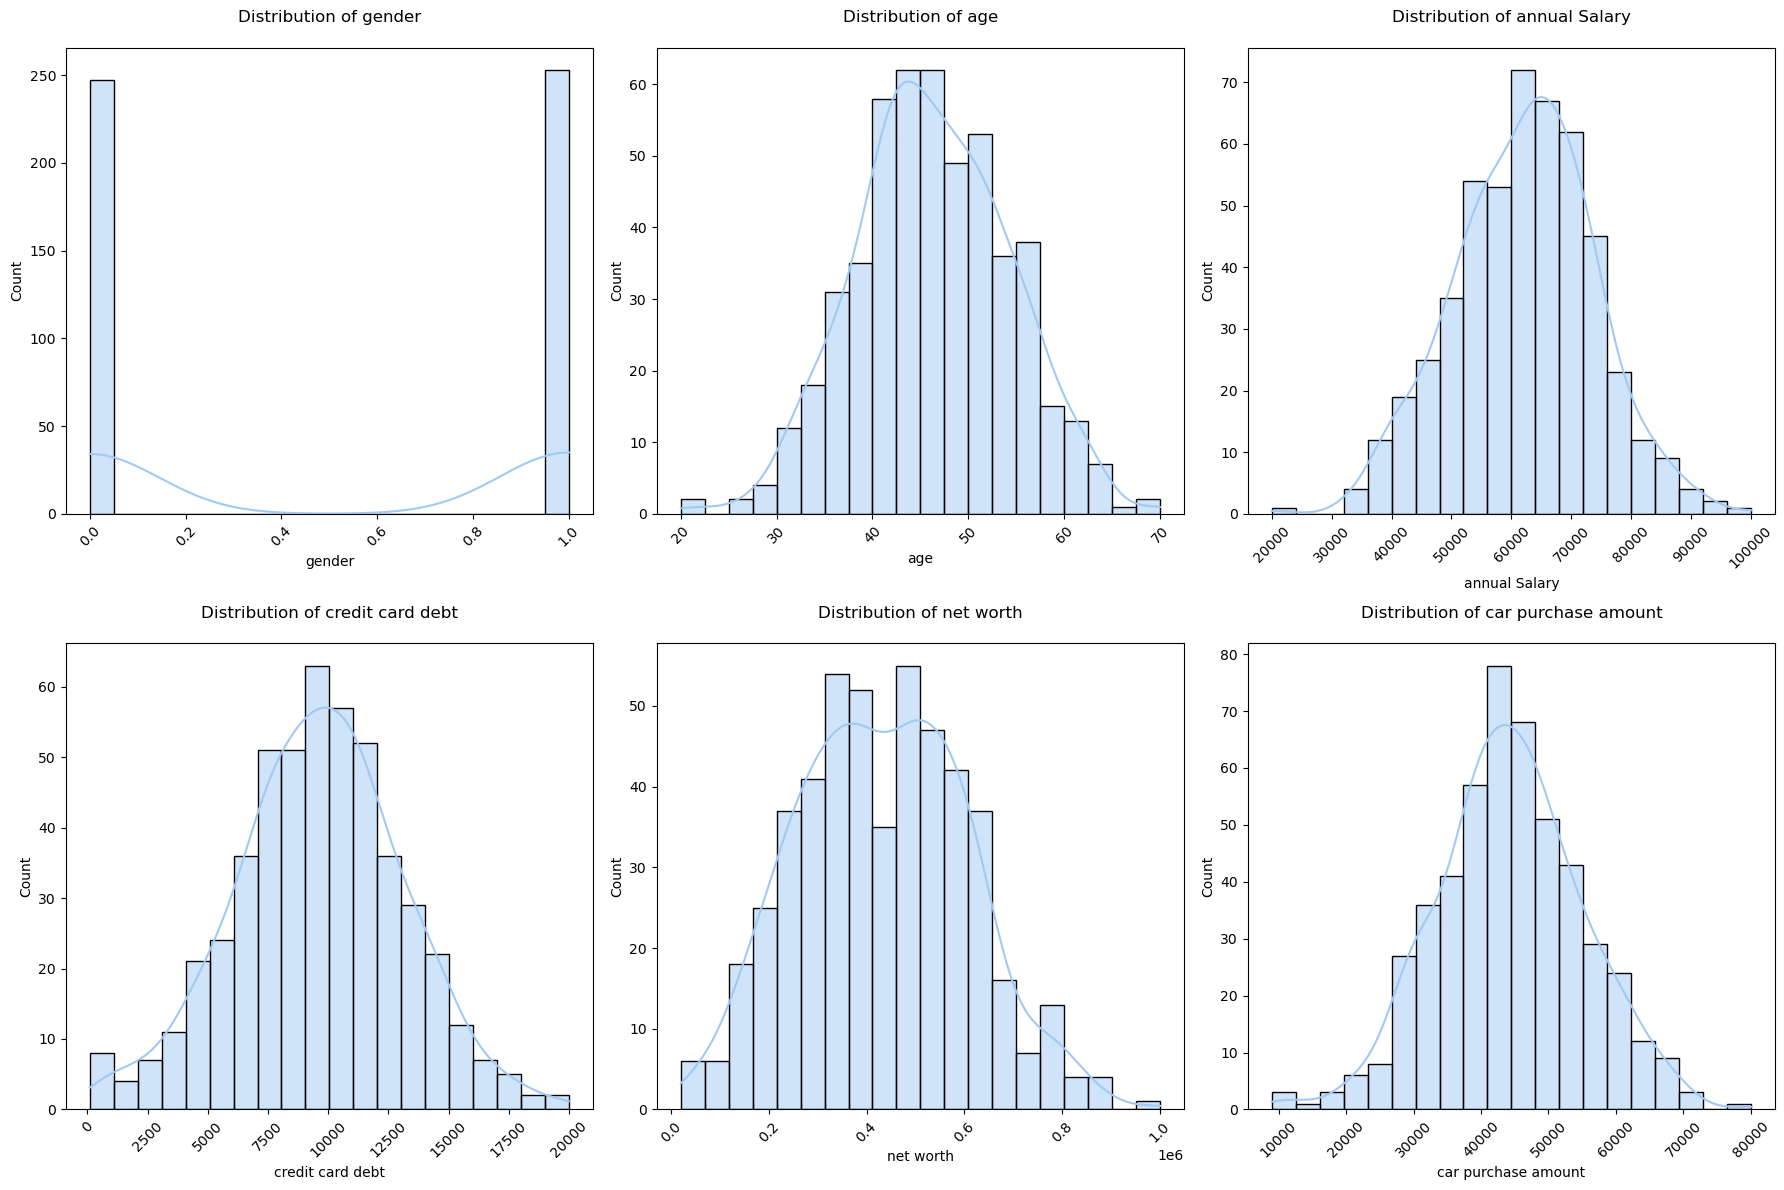

In [17]:
# Plot continuous distribution
visualizer.plot_continuous_distribution()

Scatter Plot of Age vs. Annual Salary by Gender:
We'll create a scatter plot to visualize the relationship between age and annual salary, and color points by gender.

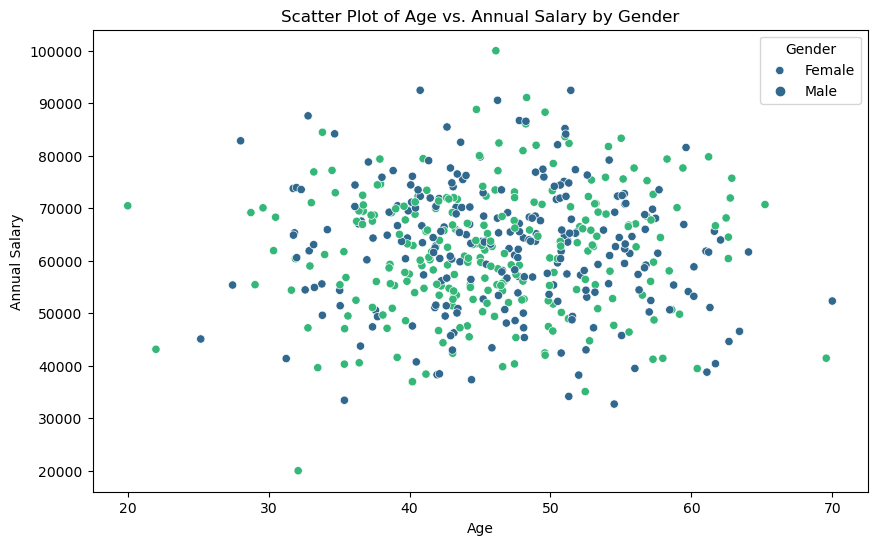

In [18]:
# Create a scatter plot of Age vs. Annual Salary, color by Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='annual Salary', hue='gender', palette='viridis')
plt.title('Scatter Plot of Age vs. Annual Salary by Gender')
plt.xlabel('Age')
plt.ylabel('Annual Salary')
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])
plt.show()


## Correlation and Outlier Analysis

### Importing Libraries
- The code starts by importing necessary libraries: `pandas` (imported as `pd`), `numpy` (imported as `np`), `matplotlib.pyplot` (imported as `plt`), and `seaborn` (imported as `sns`).

### CorrelationOutlierAnalyzer Class
- The `CorrelationOutlierAnalyzer` class is defined to analyze the correlation and identify outliers in a given dataset.

### Initialization
- The class constructor (`__init__`) takes a dataset as input and selects only numeric columns of type 'int64' and 'float64'.

### Method: plot_correlation_heatmap
- `plot_correlation_heatmap` generates a correlation heatmap using Seaborn's `heatmap` function.
- The correlation matrix is computed using `self.data.corr()`.
- A triangular mask is created to hide the upper triangle of the heatmap (as it's symmetric).
- The heatmap is displayed with annotated correlation values.

### Method: get_correlation_df
- `get_correlation_df` calculates the absolute correlation between features and sorts them in descending order.
- The correlation pairs are stored in a DataFrame and presented in a concise format.
- The function returns the top 50 correlated feature pairs.

### Method: explore_outliers
- `explore_outliers` generates box plots for each numeric column to visualize potential outliers.
- Subplots are organized in a grid, with the number of rows determined by the number of columns.
- Box plots display the distribution and potential outliers of each column.
- Titles are assigned to each plot and x-axis labels are rotated if needed.

The provided code defines a class that facilitates the analysis of correlations and the identification of potential outliers in a dataset using visualization techniques.


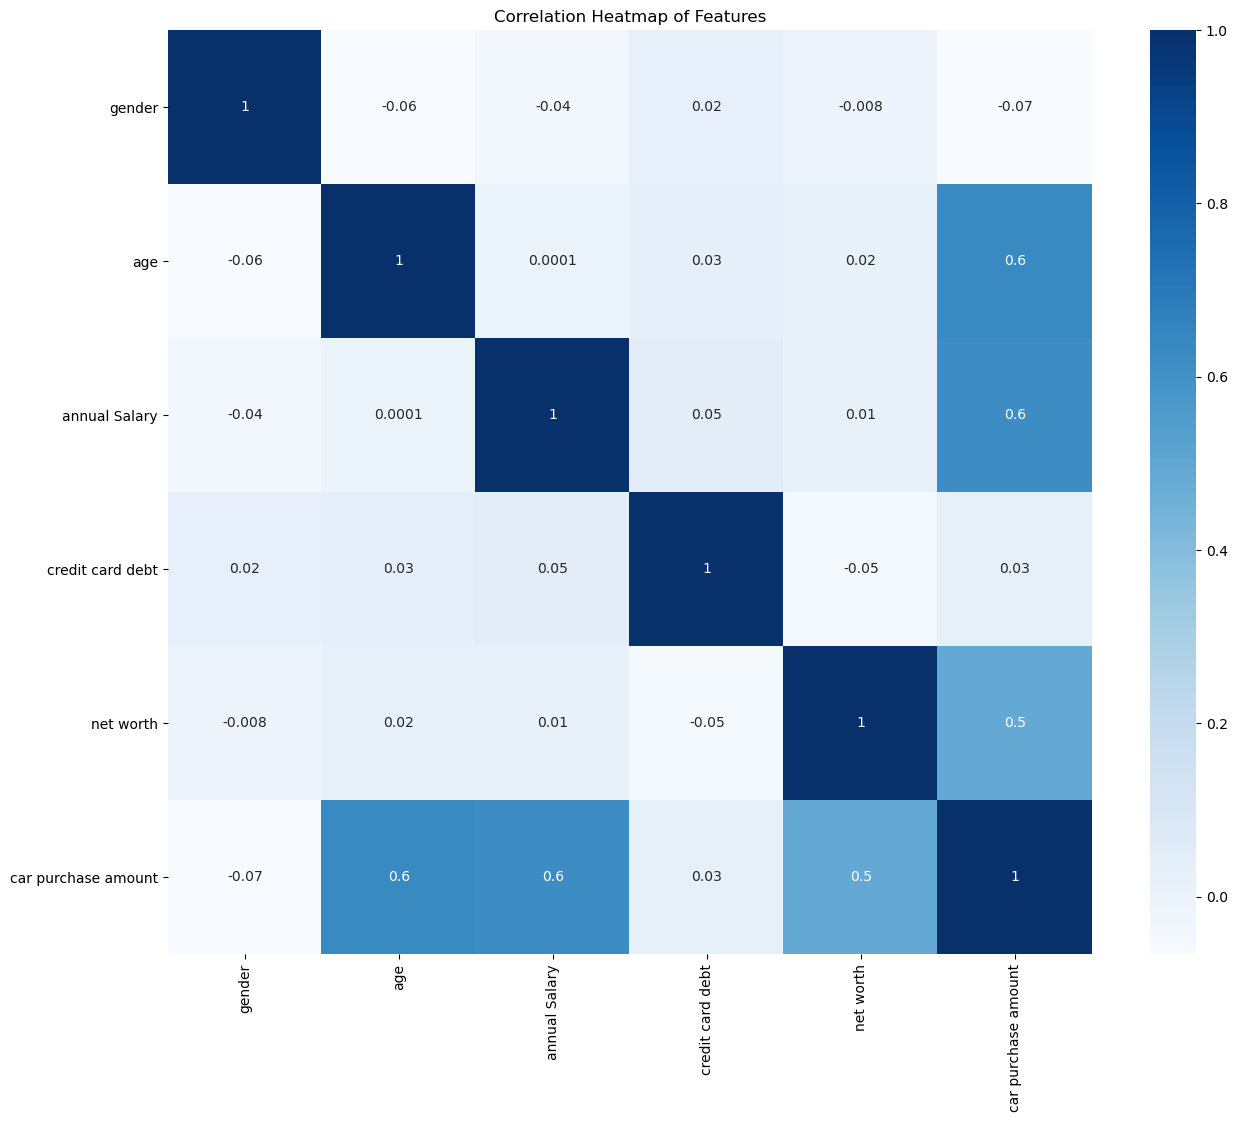

                                               cc
pairs                                            
(gender, gender)                         1.000000
(age, car purchase amount)               0.632865
(annual Salary, car purchase amount)     0.617862
(car purchase amount, net worth)         0.488580
(car purchase amount, gender)            0.066408
(gender, age)                            0.064481
(annual Salary, credit card debt)        0.049599
(net worth, credit card debt)            0.049378
(annual Salary, gender)                  0.036499
(credit card debt, age)                  0.034721
(car purchase amount, credit card debt)  0.028882
(gender, credit card debt)               0.024193
(net worth, age)                         0.020356
(net worth, annual Salary)               0.014767
(net worth, gender)                      0.008395
(annual Salary, age)                     0.000130


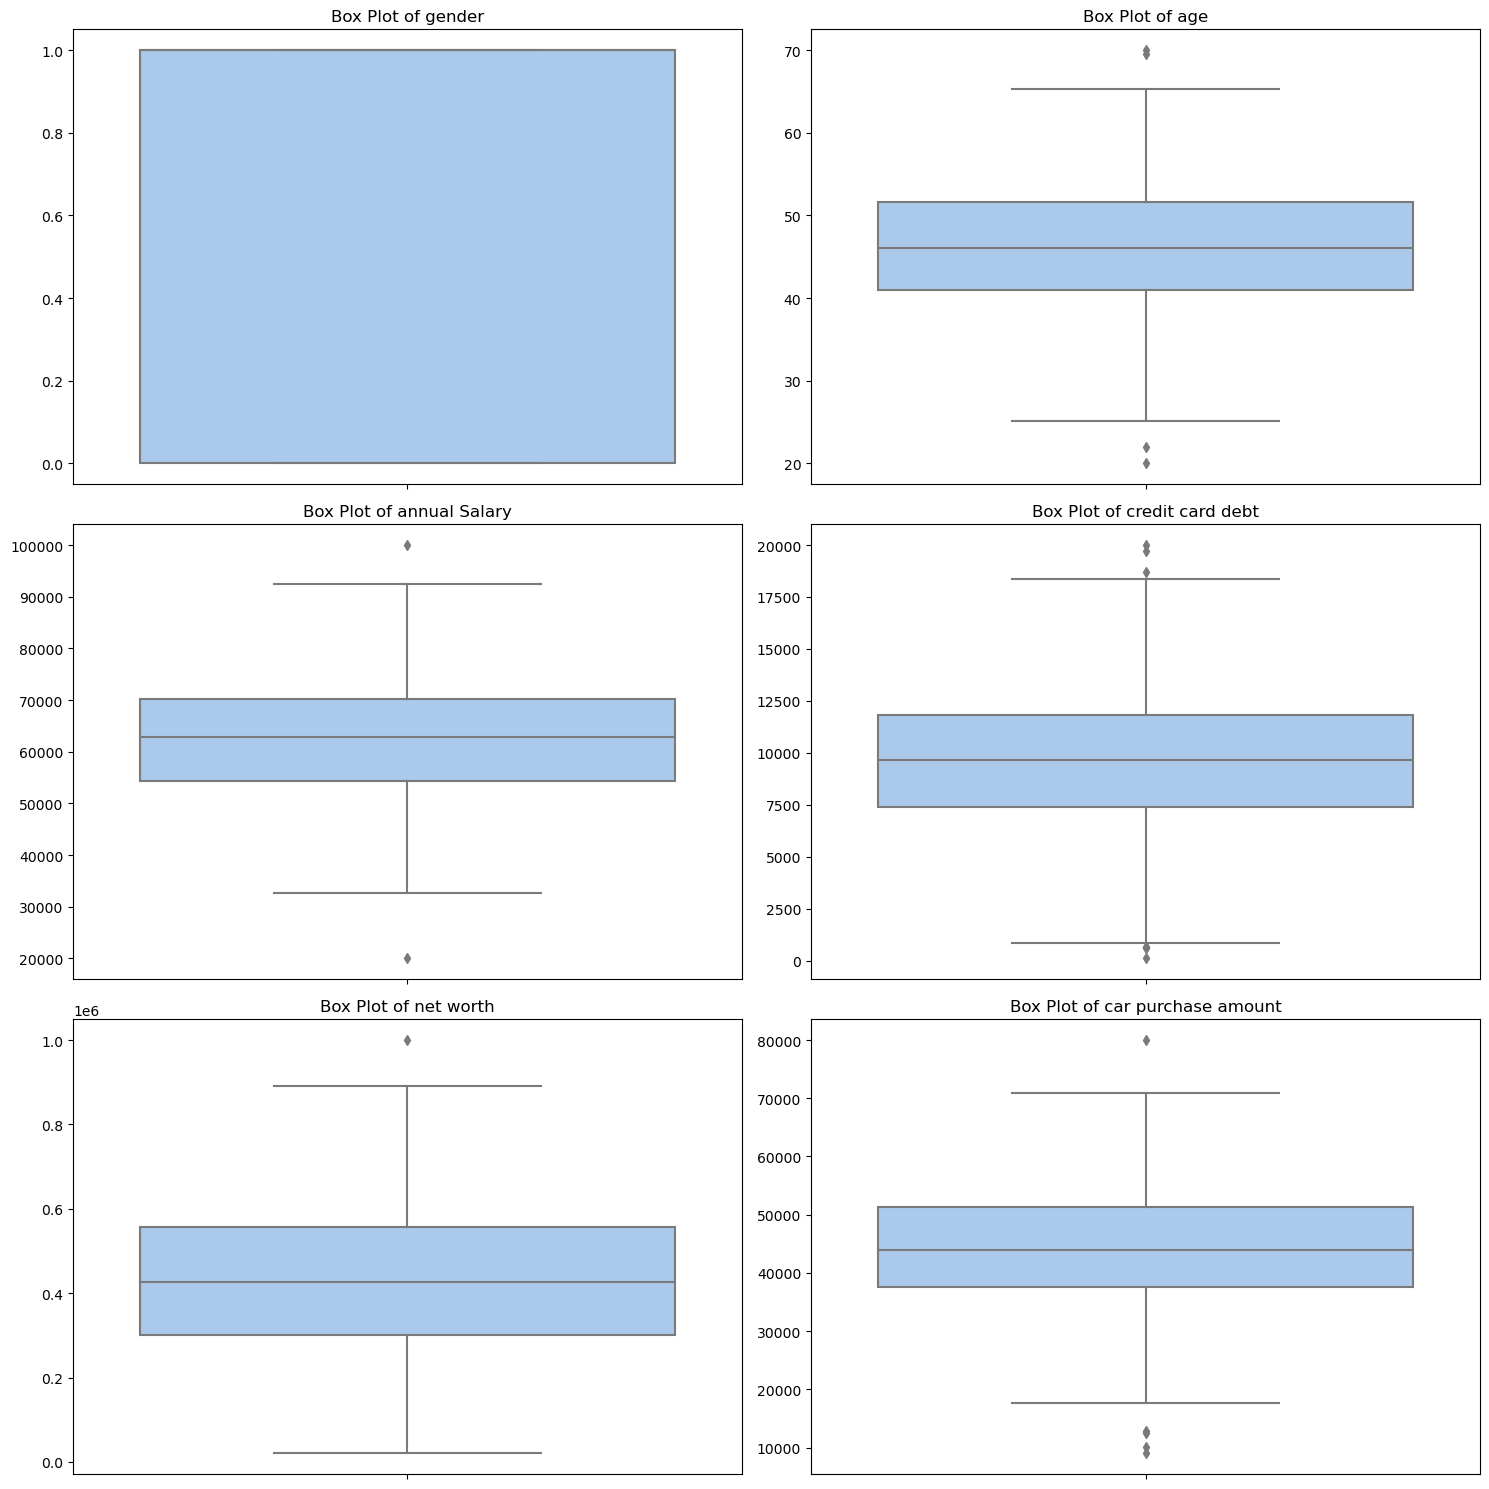

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class CorrelationOutlierAnalyzer:
    def __init__(self, data):
        self.data = data.select_dtypes(include=['int64', 'float64'])

    def plot_correlation_heatmap(self):
        corr_mat = self.data.corr()
        mask = np.triu(np.ones_like(corr_mat, dtype=bool))
        plt.subplots(figsize=(15, 12))
        sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True, fmt='.0g')
        plt.title("Correlation Heatmap of Features")
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)
        plt.show()

    def get_correlation_df(self):
        corr_df = self.data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
        corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
        corr_df.set_index(['pairs'], inplace=True)
        corr_df.drop(columns=['level_1', 'level_0'], inplace=True)
        corr_df.columns = ['cc']
        corr_df = corr_df.drop_duplicates()
        return corr_df.head(50)

    def explore_outliers(self):
        # Calculate the number of rows and columns for subplots
        num_cols = len(self.data.columns)
        num_rows = (num_cols - 1) // 2 + 1  # Divide by 2, rounded up

        # Create a grid of subplots
        fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, num_rows * 5))

        # Flatten the axes for easy iteration
        axes = axes.flatten()

        # Plot box plots for each column
        for i, col in enumerate(self.data.columns):
            sns.boxplot(data=self.data, y=col, ax=axes[i])
            axes[i].set_title(f"Box Plot of {col}")
            axes[i].set_ylabel("")  # Remove y-axis label to save space
            axes[i].set_xlabel("")  # Remove x-axis label
            axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

        plt.tight_layout()
        plt.show()

# Create an instance of CorrelationOutlierAnalyzer
data_analyzer = CorrelationOutlierAnalyzer(df)

# Plot correlation heatmap
data_analyzer.plot_correlation_heatmap()

# Get correlation dataframe
print(data_analyzer.get_correlation_df())

# Explore outliers using box plots
data_analyzer.explore_outliers()

## Outlier Detection and Removal using Z-Score

### Importing Libraries
- The code imports `numpy` as `np` and the `stats` module from `scipy`.

### Function: drop_numerical_outliers
- This function drops numerical outliers from a DataFrame based on the Z-score method.
- It takes two parameters:
  - `data`: The DataFrame for which outliers need to be removed.
  - `z_thresh` (default value: 3): The threshold for Z-score, beyond which data points are considered outliers.


In [20]:
import numpy as np
from scipy import stats

def drop_numerical_outliers(data, z_thresh=3):
    print("Before dropping numerical outliers, length of the dataframe is:", len(data))
    constrains = data.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    data.drop(data.index[~constrains], inplace=True)
    print("After dropping numerical outliers, length of the dataframe is:", len(data))

# Call the function with your DataFrame
drop_numerical_outliers(df)


Before dropping numerical outliers, length of the dataframe is: 500
After dropping numerical outliers, length of the dataframe is: 494


In [21]:
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


# FEATURE ENGINEERING

Email Domain Extension:
Extract the domain extension (e.g., .com, .edu) from the "customer e-mail" column. This might provide insights if certain email extensions are associated with different purchasing behaviors.

In [22]:
df['email_domain'] = df['customer e-mail'].str.split('.').str[-1]


Age Group:
Create age groups from the "age" column. Grouping ages can sometimes reveal patterns that aren't obvious when using raw ages.

In [23]:
# Define age groups
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60-70']

# Create 'age_group' column
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)


Income Level:
Create income levels based on "annual Salary." This can help capture the effect of income on car purchase amounts.

In [24]:
# Define income level bins
income_bins = [20000, 40000, 60000, 80000, 100000]
income_labels = ['Low', 'Moderate', 'High', 'Very High']

# Create 'income_level' column
df['income_level'] = pd.cut(df['annual Salary'], bins=income_bins, labels=income_labels)


Debt to Income Ratio:
Calculate the debt-to-income ratio by dividing "credit card debt" by "annual Salary." This could be a valuable feature to understand a customer's financial health.

In [25]:
df['debt_to_income_ratio'] = df['credit card debt'] / df['annual Salary']


Net Worth to Income Ratio:
Calculate the net worth-to-income ratio by dividing "net worth" by "annual Salary." This can capture a customer's financial stability.

In [26]:
df['net_worth_to_income_ratio'] = df['net worth'] / df['annual Salary']


Interaction Features:

Create interaction features between existing variables. For example, you can multiply "age" and "annual Salary" to create a feature representing the potential earning years left.

In [27]:
df['earning_potential'] = df['age'] * df['annual Salary']


To convert the 'gender' column into 'male' and 'female' instead of 0 and 1, you can use the map function in pandas. Here's how you can do it:

In [28]:
# Assuming you have a DataFrame named df with a 'gender' column
gender_mapping = {0: 'female', 1: 'male'}

df['gender'] = df['gender'].map(gender_mapping)


To group countries into regions or continents based on available data online, you can use the geopy library in Python, which provides access to geocoding services and geographical data. One such service is the Nominatim geocoding service, which can be used to retrieve country information, including the continent or region.

In [29]:
# Display all values without truncation
with pd.option_context('display.max_rows', None):
    print(df['country'].value_counts())


Bolivia                                         6
Mauritania                                      6
Israel                                          6
Greenland                                       5
Grenada                                         5
Samoa                                           5
Saint Barthélemy                                5
Algeria                                         5
Liechtenstein                                   5
Bhutan                                          5
Armenia                                         5
Equatorial Guinea                               5
Kyrgyzstan                                      5
Guinea                                          5
Iraq                                            5
Laos                                            5
French Polynesia                                4
Sierra Leone                                    4
Guam                                            4
Venezuela                                       4


In [30]:
import pycountry

def standardize_country_name(country_name):
    try:
        # Attempt to convert the input name to an official country name
        country = pycountry.countries.get(name=country_name)
        if country:
            return country.name
        else:
            # If no match is found, try to get the common name
            country = pycountry.countries.get(common_name=country_name)
            if country:
                return country.name
            else:
                # If still no match, return None to indicate an issue
                return None
    except AttributeError:
        # Handle the case where the input is already a standard country name
        return country_name

# Assuming you have a DataFrame named df with a 'country' column
df['country'] = df['country'].apply(standardize_country_name)

In [31]:
country_to_continent = {
    "Israel": "Asia",
    "Mauritania": "Africa",
    "Bolivia, Plurinational State of": "South America",
    "Algeria": "Africa",
    "Samoa": "Oceania",
    "Guinea": "Africa",
    "Equatorial Guinea": "Africa",
    "Bhutan": "Asia",
    "Kyrgyzstan": "Asia",
    "Iraq": "Asia",
    "Greenland": "North America",
    "Grenada": "North America",
    "Saint Barthélemy": "North America",
    "Armenia": "Asia",
    "Liechtenstein": "Europe",
    "Sierra Leone": "Africa",
    "French Polynesia": "Oceania",
    "Marshall Islands": "Oceania",
    "Andorra": "Europe",
    "Senegal": "Africa",
    "Madagascar": "Africa",
    "Venezuela, Bolivarian Republic of": "South America",
    "Sao Tome and Principe": "Africa",
    "Saint Kitts and Nevis": "North America",
    "Saint Pierre and Miquelon": "North America",
    "Guam": "Oceania",
    "Saint Vincent and the Grenadines": "North America",
    "Egypt": "Africa",
    "Bouvet Island": "Antarctica",
    "Portugal": "Europe",
    "Viet Nam": "Asia",
    "Palestine, State of": "Asia",
    "Iceland": "Europe",
    "Colombia": "South America",
    "Chile": "South America",
    "Turks and Caicos Islands": "North America",
    "Timor-Leste": "Asia",
    "Mozambique": "Africa",
    "Maldives": "Asia",
    "Turkmenistan": "Asia",
    "Martinique": "North America",
    "Åland Islands": "Europe",
    "Puerto Rico": "North America",
    "Gambia": "Africa",
    "Isle of Man": "Europe",
    "United Arab Emirates": "Asia",
    "Croatia": "Europe",
    "Christmas Island": "Oceania",
    "Uganda": "Africa",
    "Mauritius": "Africa",
    "Nepal": "Asia",
    "Uruguay": "South America",
    "Tokelau": "Oceania",
    "Brazil": "South America",
    "Guadeloupe": "North America",
    "Costa Rica": "North America",
    "Solomon Islands": "Oceania",
    "Tuvalu": "Oceania",
    "Kuwait": "Asia",
    "Dominican Republic": "North America",
    "Ecuador": "South America",
    "Yemen": "Asia",
    "Belize": "North America",
    "Slovakia": "Europe",
    "South Africa": "Africa",
    "Kiribati": "Oceania",
    "Jamaica": "North America",
    "Namibia": "Africa",
    "Djibouti": "Africa",
    "Latvia": "Europe",
    "Northern Mariana Islands": "Oceania",
    "China": "Asia",
    "Benin": "Africa",
    "Macao": "Asia",
    "Mayotte": "Africa",
    "United States Minor Outlying Islands": "North America",
    "Poland": "Europe",
    "Wallis and Futuna": "Oceania",
    "Cocos (Keeling) Islands": "Oceania",
    "Jersey": "Europe",
    "Malawi": "Africa",
    "Indonesia": "Asia",
    "Greece": "Europe",
    "Belarus": "Europe",
    "Curaçao": "North America",
    "Tunisia": "Africa",
    "India": "Asia",
    "Bahrain": "Asia",
    "Luxembourg": "Europe",
    "Somalia": "Africa",
    "Slovenia": "Europe",
    "Liberia": "Africa",
    "Guatemala": "North America",
    "Ethiopia": "Africa",
    "Turkey": "Asia",
    "Jordan": "Asia",
    "French Southern Territories": "Antarctica",
    "Mongolia": "Asia",
    "Qatar": "Asia",
    "United States": "North America",
    "Ghana": "Africa",
    "Serbia": "Europe",
    "Western Sahara": "Africa",
    "Vanuatu": "Oceania",
    "Argentina": "South America",
    "Canada": "North America",
    "San Marino": "Europe",
    "Niue": "Oceania",
    "Bangladesh": "Asia",
    "Antarctica": "Antarctica",
    "Afghanistan": "Asia",
    "Austria": "Europe",
    "Italy": "Europe",
    "Papua New Guinea": "Oceania",
    "French Guiana": "South America",
    "Morocco": "Africa",
    "Virgin Islands, British": "North America",
    "France": "Europe",
    "Bulgaria": "Europe",
    "Botswana": "Africa",
    "Heard Island and McDonald Islands": "Antarctica",
    "Philippines": "Asia",
    "Guernsey": "Europe",
    "Guinea-Bissau": "Africa",
    "Thailand": "Asia",
    "Bosnia and Herzegovina": "Europe",
    "Myanmar": "Asia",
    "Suriname": "South America",
    "Zimbabwe": "Africa",
    "Nigeria": "Africa",
    "Malta": "Europe",
    "Lithuania": "Europe",
    "Bermuda": "North America",
    "Faroe Islands": "Europe",
    "Haiti": "North America",
    "Angola": "Africa",
    "Paraguay": "South America",
    "Pakistan": "Asia",
    "Bahamas": "North America",
    "Anguilla": "North America",
    "Tonga": "Oceania",
    "Tanzania, United Republic of": "Africa",
    "Saint Lucia": "North America",
    "Mali": "Africa",
    "Sri Lanka": "Asia",
    "Gabon": "Africa",
    "Lebanon": "Asia",
    "Japan": "Asia",
    "Kazakhstan": "Asia",
    "Belgium": "Europe",
    "Togo": "Africa",
    "Cayman Islands": "North America",
    "Norfolk Island": "Oceania",
    "South Georgia and the South Sandwich Islands": "Antarctica",
    "Trinidad and Tobago": "North America",
    "Rwanda": "Africa",
    "Hungary": "Europe",
    "Central African Republic": "Africa",
    "Mexico": "North America",
    "Switzerland": "Europe",
    "Cambodia": "Asia",
    "Moldova, Republic of": "Europe",
    "Saudi Arabia": "Asia",
    "Malaysia": "Asia",
    "American Samoa": "Oceania",
    "Niger": "Africa",
    "Sudan": "Africa",
    "Seychelles": "Africa",
    "Aruba": "North America",
    "Palau": "Oceania",
    "Hong Kong": "Asia",
    "Honduras": "North America",
    "New Zealand": "Oceania",
    "El Salvador": "North America",
    "Australia": "Oceania",
    "Cameroon": "Africa",
    "Chad": "Africa",
    "Saint Helena, Ascension and Tristan da Cunha": "Africa",
    "Montenegro": "Europe",
    "Germany": "Europe",
    "Georgia": "Asia",
    "Singapore": "Asia",
    "Kenya": "Africa",
    "Peru": "South America",
    "Nauru": "Oceania",
    "Ukraine": "Europe",
    "Nicaragua": "North America",
    "Monaco": "Europe",
    "New Caledonia": "Oceania",
    "Bonaire, Sint Eustatius and Saba": "North America",
    "South Sudan": "Africa",
    "Cook Islands": "Oceania",
    "Oman": "Asia",
    "Guyana": "South America",
    "Taiwan, Province of China": "Asia",
    # Add more countries as needed...
}

df['continent'] = df['country'].map(country_to_continent)


In [32]:
df.isnull().sum()

customer name                 0
customer e-mail               0
country                      33
gender                        0
age                           0
annual Salary                 0
credit card debt              0
net worth                     0
car purchase amount           0
email_domain                  0
age_group                     0
income_level                  0
debt_to_income_ratio          0
net_worth_to_income_ratio     0
earning_potential             0
continent                    33
dtype: int64

In [33]:
df.dropna(subset=['continent'], inplace=True)
df.isnull().sum()

customer name                0
customer e-mail              0
country                      0
gender                       0
age                          0
annual Salary                0
credit card debt             0
net worth                    0
car purchase amount          0
email_domain                 0
age_group                    0
income_level                 0
debt_to_income_ratio         0
net_worth_to_income_ratio    0
earning_potential            0
continent                    0
dtype: int64

# FEATURE SELECTION, ENCODING AND SCALING

In [34]:
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount,email_domain,age_group,income_level,debt_to_income_ratio,net_worth_to_income_ratio,earning_potential,continent
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,female,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,edu,40-49,High,0.184827,3.804383,2.628794e+06,Europe
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,female,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,uk,40-49,High,0.143637,7.966972,2.723900e+06,North America
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,male,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,uk,40-49,Moderate,0.207447,11.867739,2.321563e+06,Africa
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,male,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,com,50-59,High,0.181758,6.911916,4.625001e+06,Oceania
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,male,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,net,50-59,Moderate,0.089717,9.380747,3.423302e+06,South America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,female,51.767418,77345.61633,6736.751680,665099.1390,64188.26862,com,50-59,High,0.087099,8.599054,4.003983e+06,Africa
495,Walter,ligula@Cumsociis.ca,Nepal,female,41.462515,71942.40291,6995.902524,541670.1016,48901.44342,ca,40-49,High,0.097243,7.529219,2.982913e+06,Asia
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,male,37.642000,56039.49793,12301.456790,360419.0988,31491.41457,edu,30-39,Moderate,0.219514,6.431519,2.109439e+06,Africa
497,Pearl,penatibus.et@massanonante.com,Philippines,male,53.943497,68888.77805,10611.606860,764531.3203,64147.28888,com,50-59,High,0.154040,11.098053,3.716102e+06,Asia


In [35]:
# Feature selection (drop unnecessary columns)
columns_to_drop = ['customer name', 'customer e-mail', 'country', 'earning_potential']
df = df.drop(columns=columns_to_drop)
df

,gender,age,annual Salary,credit card debt,net worth,car purchase amount,email_domain,age_group,income_level,debt_to_income_ratio,net_worth_to_income_ratio,continent
0,female,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,edu,40-49,High,0.184827,3.804383,Europe
1,female,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,uk,40-49,High,0.143637,7.966972,North America
2,male,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,uk,40-49,Moderate,0.207447,11.867739,Africa
3,male,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,com,50-59,High,0.181758,6.911916,Oceania
4,male,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,net,50-59,Moderate,0.089717,9.380747,South America
...,...,...,...,...,...,...,...,...,...,...,...,...
494,female,51.767418,77345.61633,6736.751680,665099.1390,64188.26862,com,50-59,High,0.087099,8.599054,Africa
495,female,41.462515,71942.40291,6995.902524,541670.1016,48901.44342,ca,40-49,High,0.097243,7.529219,Asia
496,male,37.642000,56039.49793,12301.456790,360419.0988,31491.41457,edu,30-39,Moderate,0.219514,6.431519,Africa
497,male,53.943497,68888.77805,10611.606860,764531.3203,64147.28888,com,50-59,High,0.154040,11.098053,Asia


In [36]:
# Perform one-hot encoding for 'continent', 'email_domain', and 'gender'
df = pd.get_dummies(df, columns=['continent', 'email_domain', 'gender'], 
                            prefix=['continent', 'email', 'gender'], 
                            drop_first=True)


In [37]:
# Define mapping dictionaries
income_level_mapping = {
    'Low': 0,
    'Moderate': 1,
    'High': 2,
    'Very High': 3
}

age_group_mapping = {
    '20-29': 0,
    '30-39': 1,
    '40-49': 2,
    '50-59': 3,
    '60-70': 4
}

# Apply ordinal encoding
df['income_level'] = df['income_level'].map(income_level_mapping)
df['age_group'] = df['age_group'].map(age_group_mapping)
df

,age,annual Salary,credit card debt,net worth,car purchase amount,age_group,income_level,debt_to_income_ratio,net_worth_to_income_ratio,continent_Antarctica,...,continent_Europe,continent_North America,continent_Oceania,continent_South America,email_com,email_edu,email_net,email_org,email_uk,gender_male
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,2,2,0.184827,3.804383,0,...,1,0,0,0,0,1,0,0,0,0
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,2,2,0.143637,7.966972,0,...,0,1,0,0,0,0,0,0,1,0
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,2,1,0.207447,11.867739,0,...,0,0,0,0,0,0,0,0,1,1
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,3,2,0.181758,6.911916,0,...,0,0,1,0,1,0,0,0,0,1
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,3,1,0.089717,9.380747,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,51.767418,77345.61633,6736.751680,665099.1390,64188.26862,3,2,0.087099,8.599054,0,...,0,0,0,0,1,0,0,0,0,0
495,41.462515,71942.40291,6995.902524,541670.1016,48901.44342,2,2,0.097243,7.529219,0,...,0,0,0,0,0,0,0,0,0,0
496,37.642000,56039.49793,12301.456790,360419.0988,31491.41457,1,1,0.219514,6.431519,0,...,0,0,0,0,0,1,0,0,0,1
497,53.943497,68888.77805,10611.606860,764531.3203,64147.28888,3,2,0.154040,11.098053,0,...,0,0,0,0,1,0,0,0,0,1


In [38]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# List of numerical columns to scale (exclude 'car purchase amount')
numerical_columns = ['age', 'annual Salary', 'credit card debt', 'net worth', 'debt_to_income_ratio', 'net_worth_to_income_ratio']

# Fit and transform the selected columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df

,age,annual Salary,credit card debt,net worth,car purchase amount,age_group,income_level,debt_to_income_ratio,net_worth_to_income_ratio,continent_Antarctica,...,continent_Europe,continent_North America,continent_Oceania,continent_South America,email_com,email_edu,email_net,email_org,email_uk,gender_male
0,0.338617,0.503806,0.567610,0.251264,35321.45877,2,2,0.444173,0.198104,0,...,1,0,0,0,0,1,0,0,0,0
1,0.315565,0.567962,0.462667,0.586356,45115.52566,2,2,0.339727,0.435553,0,...,0,1,0,0,0,0,0,0,1,0
2,0.369190,0.353011,0.544470,0.709707,42925.70921,2,1,0.501531,0.658067,0,...,0,0,0,0,0,0,0,0,1,1
3,0.724420,0.780819,0.712766,0.606581,67422.36313,3,2,0.436391,0.375369,0,...,0,0,1,0,1,0,0,0,0,1
4,0.701919,0.452229,0.245496,0.620013,55915.46248,3,1,0.203001,0.516200,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.571600,0.746951,0.316510,0.740268,64188.26862,3,2,0.196364,0.471609,0,...,0,0,0,0,1,0,0,0,0,0
495,0.329473,0.656556,0.329865,0.598630,48901.44342,2,2,0.222086,0.410582,0,...,0,0,0,0,0,0,0,0,0,0
496,0.239704,0.390501,0.603274,0.390640,31491.41457,1,1,0.532129,0.347965,0,...,0,0,0,0,0,1,0,0,0,1
497,0.622730,0.605469,0.516192,0.854369,64147.28888,3,2,0.366105,0.614161,0,...,0,0,0,0,1,0,0,0,0,1


# MODELLING

Step 1: Split the Data

In [39]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and the target (y)
X = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 2: Choose a Regression Model and evaluate

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")
print(f"R-squared: {r2}")



Mean Squared Error: 2.6472231449178416
Root Mean Squared Error: 1.627028931801104
R-squared: 0.9999999774852221


In [ ]:
Step 4: Tune the Model

apply Ridge and Lasso regression with different regularization strengths and evaluate their performance:

In [47]:
from sklearn.linear_model import Ridge, Lasso

# Create a list of alpha (regularization strength) values to try
alpha_values = [0.01, 0.1, 1, 10, 100]

# Initialize lists to store results
ridge_mse_values = []
ridge_rmse_values = []
ridge_r2_values = []

lasso_mse_values = []
lasso_rmse_values = []
lasso_r2_values = []

for alpha in alpha_values:
    # Ridge Regression
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_y_pred = ridge_model.predict(X_test)
    ridge_mse = mean_squared_error(y_test, ridge_y_pred)
    ridge_rmse = np.sqrt(ridge_mse)
    ridge_r2 = r2_score(y_test, ridge_y_pred)
    ridge_mse_values.append(ridge_mse)
    ridge_rmse_values.append(ridge_rmse)
    ridge_r2_values.append(ridge_r2)

    # Lasso Regression
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    lasso_y_pred = lasso_model.predict(X_test)
    lasso_mse = mean_squared_error(y_test, lasso_y_pred)
    lasso_rmse = np.sqrt(lasso_mse)
    lasso_r2 = r2_score(y_test, lasso_y_pred)
    lasso_mse_values.append(lasso_mse)
    lasso_rmse_values.append(lasso_rmse)
    lasso_r2_values.append(lasso_r2)

# Find the best performing Ridge and Lasso models based on RMSE
best_ridge_alpha = alpha_values[np.argmin(ridge_rmse_values)]
best_lasso_alpha = alpha_values[np.argmin(lasso_rmse_values)]

print("Ridge Regression:")
print(f"Best Alpha: {best_ridge_alpha}")
print(f"Best RMSE: {min(ridge_rmse_values)}")

print("\nLasso Regression:")
print(f"Best Alpha: {best_lasso_alpha}")
print(f"Best RMSE: {min(lasso_rmse_values)}")


Ridge Regression:
Best Alpha: 0.01
Best RMSE: 24.011491731222417

Lasso Regression:
Best Alpha: 0.1
Best RMSE: 2.1630252251428788


Step 4: Select the best Model
Lasso Regression with an alpha value of 0.1 performed the best in terms of RMSE

In [48]:
from sklearn.linear_model import Lasso

# Choose the best alpha value for Lasso Regression
best_alpha = 0.1

# Create a Lasso Regression model with the best alpha
lasso_model = Lasso(alpha=best_alpha)

# Train the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
lasso_y_pred = lasso_model.predict(X_test)

# Evaluate the Lasso Regression model
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_y_pred)

print("Lasso Regression:")
print(f"Alpha: {best_alpha}")
print(f"RMSE: {lasso_rmse}")
print(f"R-squared: {lasso_r2}")


Lasso Regression:
Alpha: 0.1
RMSE: 2.1630252251428788
R-squared: 0.9999999602075862


Step 5: Evaluate the model's performance on the test data


In [50]:
# Make predictions using the Lasso Regression model on the test data
lasso_test_predictions = lasso_model.predict(X_test)

# Evaluate the model's performance on the test data
lasso_mse = mean_squared_error(y_test, lasso_test_predictions)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_test_predictions)

print(f"Mean Squared Error (Test): {lasso_mse}")
print(f"Root Mean Squared Error (Test): {lasso_rmse}")
print(f"R-squared (Test): {lasso_r2}")


Mean Squared Error (Test): 4.678678124604402
Root Mean Squared Error (Test): 2.1630252251428788
R-squared (Test): 0.9999999602075862


## Most important features

In [52]:
# Get the coefficients of the Lasso Regression model
lasso_coefficients = lasso_model.coef_

# Create a DataFrame to display the coefficients along with feature names
coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lasso_coefficients})

# Sort the coefficients by absolute value in descending order to find the most important features
coefficients_df['Absolute_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the top N most important features (adjust N as needed)
top_N = 15  # You can change this number to display more or fewer features
top_features = coefficients_df.head(top_N)

print("Top", top_N, "Most Important Features:")
print(top_features)


Top 15 Most Important Features:
                    Feature   Coefficient  Absolute_Coefficient
0                       age  35796.846036          35796.846036
1             annual Salary  33603.033358          33603.033358
3                 net worth  25255.037326          25255.037326
4                 age_group      3.996603              3.996603
5              income_level      2.252736              2.252736
12        continent_Oceania      0.000000              0.000000
18                 email_uk      0.000000              0.000000
17                email_org     -0.000000              0.000000
16                email_net      0.000000              0.000000
15                email_edu     -0.000000              0.000000
14                email_com      0.000000              0.000000
13  continent_South America      0.000000              0.000000
10         continent_Europe     -0.000000              0.000000
11  continent_North America     -0.000000              0.000000
9       

The first five features (age, annual Salary, net worth, age_group, and income_level) have non-zero coefficients, indicating that they are the most important features in making predictions with your Lasso Regression model. The other features have coefficients close to zero, indicating that they have little to no influence on the model's predictions.

# Recommendations and Conclusions

## Recommendations

Based on our analysis and modeling, we can provide the following recommendations:

1. **Feature Importance:** Pay close attention to the most important features identified by the Lasso Regression model, which include `age`, `annual Salary`, and `net worth`. These features have the highest impact on predicting the car purchase amount.

2. **Age and Income:** It is evident that age and income are significant factors in determining the car purchase amount. Consider tailoring marketing and sales strategies to specific age groups and income levels to optimize sales.

3. **Continental Insights:** While continent-based one-hot encoding did not yield significant coefficients, it may still be valuable for regional marketing efforts or understanding global trends. Further exploration may reveal continent-specific insights.

4. **Regularization:** Continue to use Lasso Regression for its feature selection capabilities and regularization to prevent overfitting. The selected alpha value of 0.1 performed well and should be maintained.

5. **Customer Segmentation:** Consider creating customer segments based on age, income, and other significant features. This can help in targeted advertising and product offerings.

## Conclusions

In conclusion, our analysis and modeling efforts have provided valuable insights into predicting car purchase amounts based on customer attributes. We have identified key features such as age, annual salary, and net worth as crucial factors in making accurate predictions.

The Lasso Regression model with an alpha value of 0.1 proved to be the most effective in this scenario, resulting in a low root mean squared error (RMSE) and high R-squared value, indicating a strong fit to the data.

Understanding customer demographics and income levels is essential for tailoring marketing and sales strategies. Additionally, regularized regression techniques help in feature selection and preventing overfitting, making them valuable tools in predictive modeling.

Continued data collection and analysis will further enhance our ability to make accurate predictions and drive informed business decisions.